In [13]:
import pandas as pd
import numpy as np

### The input data

In [14]:
X_train = np.load('data/Data_train/data_train.npy', mmap_mode='r')

print("The training data is made of {} images of {}x{} pixels".format(
    *X_train.shape))

n_img = len(X_train)

The training data is made of 619 images of 400x400 pixels


In [48]:
df = pd.read_csv('data/Data_train/data_train_labels.csv')
df.head()

,id,label
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619 entries, 0 to 618
Data columns (total 2 columns):
id       619 non-null int64
label    619 non-null int64
dtypes: int64(2)
memory usage: 9.8 KB


The labels consist of a `pandas.DataFrame` containing for each row :
- `id` : the unique identifier of the image
- `label` : the class to which belongs the observed nevus :
    - `1 : benign`
    - `2 : unknown` 
    - `3 : malignant`

,Label,Count,Name
0,1,324,Benign
1,2,137,Unknown
2,3,158,Malignant


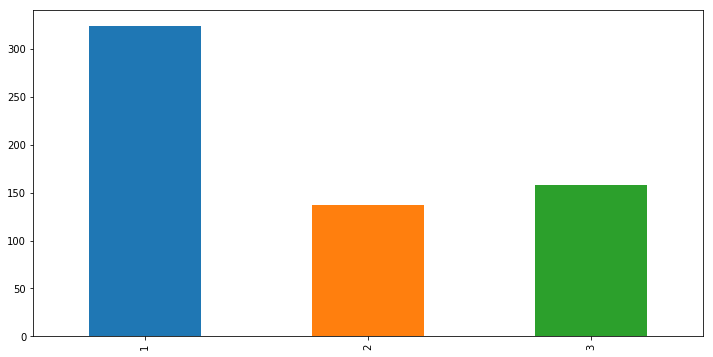

In [50]:
df['label'].value_counts().sort_index().plot.bar(figsize=(12, 6))

labels = ['Benign','Unknown','Malignant']

labels_count_df = df.groupby(['label']).agg('count').reset_index()
labels_count_df['name'] = pd.Series(data=labels)
labels_count_df.columns = ['Label','Count','Name']
labels_count_df

Here, we display one image for each class.

In [22]:
idx_list = [10, 335, 500]

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

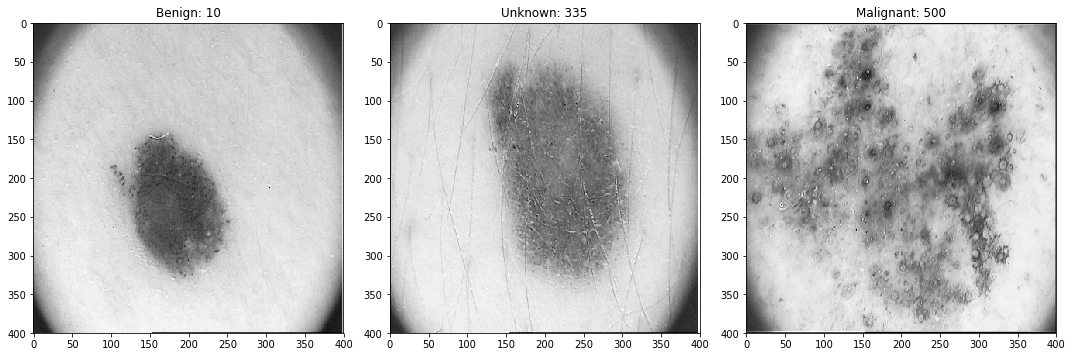

In [52]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
for i, idx in enumerate(idx_list):
    axes[i].imshow(X_train[idx], cmap='Greys_r')
    axes[i].set_title(labels[i] + ': %d' % idx)
fig.tight_layout()